In [2]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from ipywidgets import widgets, interactive
sns.set_style("white")

In [7]:
df1= pd.read_excel('inputs/birthRate.xlsx',
                      sheet_name='NombreCodeNatilidad ES') #Es natilidad, fue un error, pero dejarlo así

df2= pd.read_excel('inputs/birthRate.xlsx',
                      sheet_name='NombresCode ES')

df3= pd.read_excel('inputs/birthRate.xlsx',
                      sheet_name='NombresBanderaCode EN')

df4= pd.read_excel('inputs/birthRate.xlsx',
                      sheet_name='NombreCodeGDP')

df5= pd.read_excel('inputs/birthRate.xlsx',
                      sheet_name='OCDE')

print ('Data read into a pandas dataframes!')

Data read into a pandas dataframes!


In [103]:
df1.set_index('Country Code', inplace=True)
df2.set_index('Country Code', inplace=True)
df2.drop(['Region','Country Name'], axis=1, inplace=True)
df3.set_index('alpha-3', inplace=True)

In [104]:
df_combined = pd.merge(df1, df3, how='inner', left_index=True, right_index=True)
df_combined = pd.merge(df_combined, df2, how='inner', left_index=True, right_index=True)
df_combined.rename(columns={'Country Name': 'Country Name ES'},inplace=True)
df_combined.rename(columns={'country': 'Country Name EN'},inplace=True)
df_combined.rename(columns={'images_file': 'Image File'},inplace=True)
df_combined.rename(columns={'image_url': 'Image URL'},inplace=True)
df_combined.rename(columns={'region': 'Region'},inplace=True)
df_combined.rename(columns={'sub-region': 'Sub Region'},inplace=True)
df_combined.rename(columns={'intermediate-region': 'Intermediate Region'},inplace=True)
df_combined.rename(columns={'Income_Group': 'Income Group'},inplace=True)
column_b = df_combined.pop('Country Name EN')
df_combined.insert(0, 'Country Name EN', column_b)
df_combined.head()

,Country Name EN,Country Name ES,1985,1986,1987,1988,1989,1990,1991,1992,...,2020,2021,2022,2023,Image File,Image URL,Region,Sub Region,Intermediate Region,Income Group
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,Afganistán,50.553,50.728,50.845,50.980,51.162,51.423,51.788,51.948,...,36.051,35.842,NaN,NaN,Flag_of_Afghanistan.svg,https://upload.wikimedia.org/wikipedia/commons...,Asia,Southern Asia,NaN,Países de ingreso bajo
AGO,Angola,Angola,52.136,52.190,52.146,51.973,51.699,51.344,50.926,50.374,...,39.271,38.809,NaN,NaN,Flag_of_Angola.svg,https://upload.wikimedia.org/wikipedia/commons...,Africa,Sub-Saharan Africa,Middle Africa,Países de ingreso mediano bajo
ALB,Albania,Albania,26.297,25.935,25.685,25.364,24.860,24.415,23.723,23.145,...,10.285,10.240,NaN,NaN,Flag_of_Albania.svg,https://upload.wikimedia.org/wikipedia/commons...,Europe,Southern Europe,NaN,Ingreso mediano alto
AND,Andorra,Andorra,NaN,11.900,11.000,11.600,12.500,11.900,11.900,12.100,...,NaN,NaN,NaN,NaN,Flag_of_Andorra.svg,https://upload.wikimedia.org/wikipedia/commons...,Europe,Southern Europe,NaN,Ingreso alto
ARE,United Arab Emirates,Emiratos Árabes Unidos,29.488,29.651,28.411,27.396,26.618,25.923,24.574,23.839,...,10.620,10.307,NaN,NaN,Flag_of_the_United_Arab_Emirates.svg,https://upload.wikimedia.org/wikipedia/commons...,Asia,Western Asia,NaN,Ingreso alto


In [105]:
df_GDP = df4.pivot_table(index='Country Code', columns='year', values='GDP_USD', aggfunc='first')
df_GDPPC = df4.pivot_table(index='Country Code', columns='year', values='GDP_per_capita_USD', aggfunc='first')
df_GDP.head(100)

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN
AFE,1.362970e+11,1.525180e+11,1.861450e+11,2.041400e+11,2.175390e+11,2.532240e+11,2.734030e+11,2.382550e+11,2.365270e+11,2.401200e+11,...,9.730430e+11,9.839370e+11,1.003680e+12,9.242530e+11,8.823550e+11,1.020650e+12,9.910220e+11,9.975340e+11,9.216460e+11,1.082100e+12
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
AFW,1.165070e+11,1.074980e+11,1.103220e+11,1.089430e+11,1.017690e+11,1.218020e+11,1.174570e+11,1.182820e+11,9.882637e+10,8.628174e+10,...,7.275700e+11,8.207930e+11,8.649900e+11,7.607340e+11,6.905460e+11,6.837490e+11,7.416900e+11,7.945430e+11,7.844460e+11,8.358080e+11
AGO,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,...,1.249980e+11,1.334020e+11,1.372440e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HKG,3.569954e+10,4.107557e+10,5.062257e+10,5.970740e+10,6.879037e+10,7.692829e+10,8.895962e+10,1.042720e+11,1.203540e+11,1.358120e+11,...,2.626290e+11,2.756970e+11,2.914590e+11,3.093840e+11,3.208580e+11,3.412730e+11,3.617310e+11,3.630520e+11,3.448810e+11,3.681390e+11
HND,5.278121e+09,5.677829e+09,6.190521e+09,5.902717e+09,5.432345e+09,4.923010e+09,4.648668e+09,4.943700e+09,4.926729e+09,4.642281e+09,...,1.852860e+10,1.849971e+10,1.975649e+10,2.097977e+10,2.171762e+10,2.313623e+10,2.406778e+10,2.508998e+10,2.382784e+10,2.848867e+10
HPC,1.025590e+11,1.178310e+11,1.296880e+11,1.367110e+11,1.395650e+11,1.613120e+11,1.749250e+11,1.317740e+11,1.367390e+11,1.161040e+11,...,6.048670e+11,6.731570e+11,7.152290e+11,6.935470e+11,7.288690e+11,8.087580e+11,7.702270e+11,7.976180e+11,8.032840e+11,8.944940e+11


In [106]:
df_GDPPC.head()

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,6.474365e+09,7.886890e+09,9.769584e+09,1.139598e+09,1.230539e+09,1.349469e+09,1.404835e+09,1.494227e+09,1.624158e+09,...,2.549684e+09,2.644243e+08,2.689506e+09,2.839905e+09,2.845372e+09,2.934842e+09,3.025371e+09,3.113588e+09,2.338430e+09,NaN
AFE,5.179229e+09,5.626942e+09,6.667441e+09,7.099917e+09,7.348665e+09,8.312020e+09,8.723913e+09,7.393037e+09,7.140099e+09,7.054473e+09,...,1.777304e+08,1.748906e+09,1.736242e+08,1.556316e+09,1.446534e+09,1.629404e+09,1.541032e+09,1.511309e+09,1.360879e+09,1.557723e+09
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.388459e+09,6.243155e+09,6.142233e+09,5.560072e+09,5.120128e+09,5.166799e+09,4.856684e+09,4.941793e+09,5.167479e+09,NaN
AFW,6.515100e+09,5.849073e+09,5.841193e+09,5.613615e+09,5.104191e+09,5.947257e+09,5.584358e+09,5.476629e+09,4.456560e+09,3.789404e+09,...,1.965116e+08,2.157495e+09,2.212914e+09,1.894322e+09,1.673844e+09,1.613490e+09,1.704136e+09,1.777853e+09,1.709764e+09,1.774921e+09
AGO,7.582379e+09,6.852698e+09,7.562621e+09,7.923030e+09,8.905536e+09,9.477043e+09,8.656927e+09,6.563620e+09,4.412008e+08,3.286731e+09,...,4.978434e+09,5.127717e+09,5.094112e+09,3.127891e+09,1.728024e+09,2.313221e+09,2.524942e+09,2.177799e+09,1.631432e+09,2.137909e+09


In [107]:
df_test = df_GDP.loc[['CHL']]
df_test2 = df_combined.loc[["CHL"]]
df_test2.drop(['Country Name EN','Country Name ES', '2022', '2023', 'Image File', 'Image URL', 'Region', 'Sub Region','Intermediate Region', 'Income Group'], axis=1, inplace=True)
df_test=df_test.rename(index={"CHL":"GDP"})
df_test2=df_test2.rename(index={"CHL":"BIRTH"})

In [108]:
a = df_test.columns
print(a)
df_test.head()

Index([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021],
      dtype='int64', name='year')


year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Code,,,,,,,,,,,,,,,,,,,,,
GDP,1.770289e+10,1.889105e+10,2.225541e+10,2.604023e+10,2.988569e+10,3.311389e+10,3.783479e+10,4.596433e+10,4.929777e+10,5.700843e+10,...,2.671760e+11,2.772390e+11,2.594050e+11,2.424970e+11,2.492990e+11,2.763650e+11,2.954030e+11,2.785850e+11,2.527270e+11,3.170590e+11


In [109]:
df_test2.columns = df_test2.columns.astype(int)
a = df_test2.columns
print(a) 
df_test2.head()

Index([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021],
      dtype='int64')


,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Code,,,,,,,,,,,,,,,,,,,,,
BIRTH,22.521,22.53,22.527,22.473,22.39,22.19,21.866,21.048,20.503,19.918,...,13.857,13.697,13.545,13.211,12.7,12.13,11.94,11.855,11.834,11.788


In [110]:
df_test3 = pd.concat([df_test2, df_test])
# Hay que cambiar los nombres de las columnas, pero fuera de eso está de pana, creo
# Igualmente, para Chile no hay datos desde el 
df_test3 = df_test3.transpose()
df_test3.head()

Country Code,BIRTH,GDP
1985,22.521,1.770289e+10
1986,22.530,1.889105e+10
1987,22.527,2.225541e+10
1988,22.473,2.604023e+10
1989,22.390,2.988569e+10


Text(0.5, 1.0, 'PIB per Cápita vs Nacidos por mujer 2007')

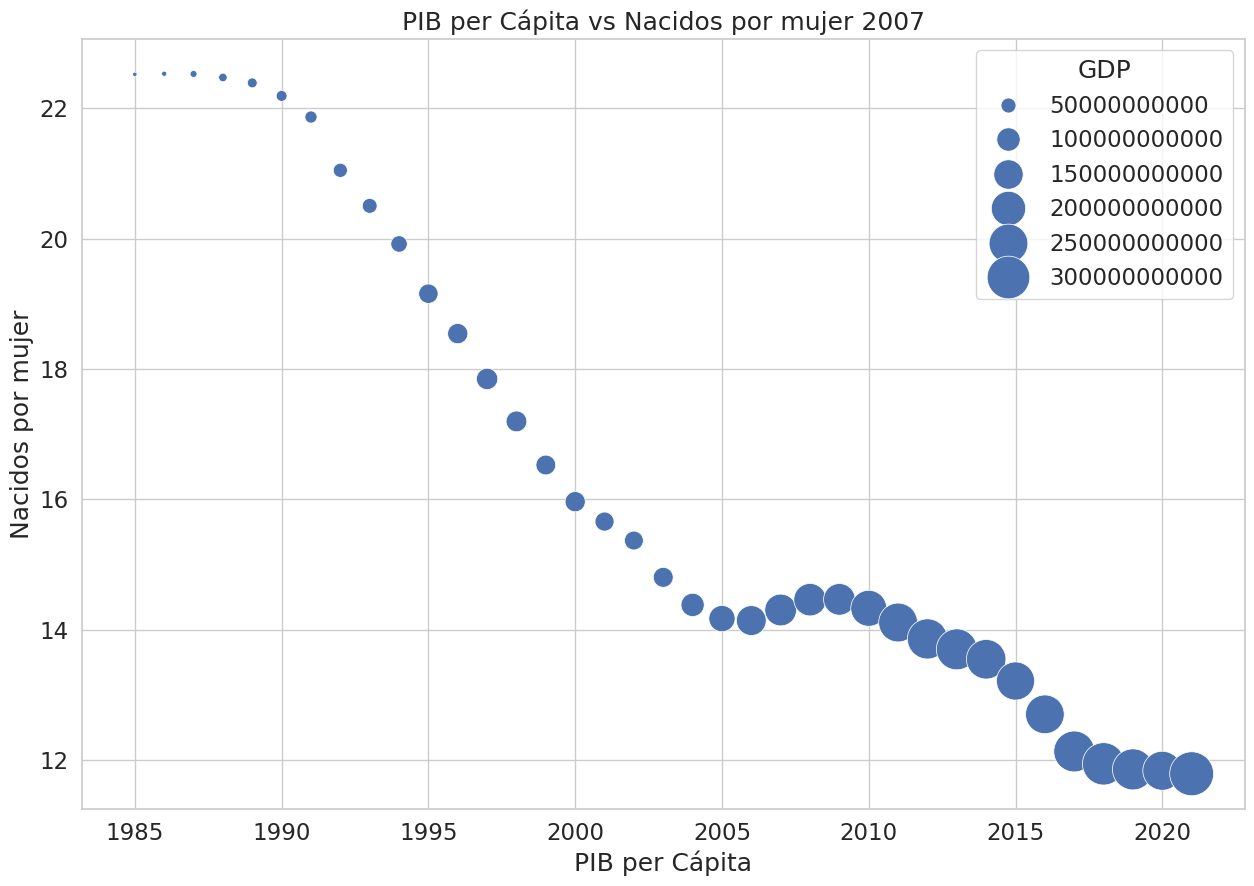

In [111]:
# transformamos el scatterplot anterior en un Bubble chart, añadiendo la dimensión de población pop
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.scatterplot(x=df_test3.index, y='BIRTH', size='GDP', data=df_test3, sizes=(10, 1000))
ax.set(xlabel='PIB per Cápita', ylabel='Nacidos por mujer')
ax.set_title('PIB per Cápita vs Nacidos por mujer 2007')

In [112]:
df_combined.head(5)

,Country Name EN,Country Name ES,1985,1986,1987,1988,1989,1990,1991,1992,...,2020,2021,2022,2023,Image File,Image URL,Region,Sub Region,Intermediate Region,Income Group
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,Afganistán,50.553,50.728,50.845,50.980,51.162,51.423,51.788,51.948,...,36.051,35.842,NaN,NaN,Flag_of_Afghanistan.svg,https://upload.wikimedia.org/wikipedia/commons...,Asia,Southern Asia,NaN,Países de ingreso bajo
AGO,Angola,Angola,52.136,52.190,52.146,51.973,51.699,51.344,50.926,50.374,...,39.271,38.809,NaN,NaN,Flag_of_Angola.svg,https://upload.wikimedia.org/wikipedia/commons...,Africa,Sub-Saharan Africa,Middle Africa,Países de ingreso mediano bajo
ALB,Albania,Albania,26.297,25.935,25.685,25.364,24.860,24.415,23.723,23.145,...,10.285,10.240,NaN,NaN,Flag_of_Albania.svg,https://upload.wikimedia.org/wikipedia/commons...,Europe,Southern Europe,NaN,Ingreso mediano alto
AND,Andorra,Andorra,NaN,11.900,11.000,11.600,12.500,11.900,11.900,12.100,...,NaN,NaN,NaN,NaN,Flag_of_Andorra.svg,https://upload.wikimedia.org/wikipedia/commons...,Europe,Southern Europe,NaN,Ingreso alto
ARE,United Arab Emirates,Emiratos Árabes Unidos,29.488,29.651,28.411,27.396,26.618,25.923,24.574,23.839,...,10.620,10.307,NaN,NaN,Flag_of_the_United_Arab_Emirates.svg,https://upload.wikimedia.org/wikipedia/commons...,Asia,Western Asia,NaN,Ingreso alto


In [113]:
df_coro = df_combined.copy()
df_coro = df_coro.drop(['Country Name EN','Country Name ES', '2022', '2023', 'Image File', 'Image URL', 'Region', 'Sub Region','Intermediate Region', 'Income Group'], axis=1)
df_coro = df_coro.reset_index()
df_coro = pd.melt(df_coro, id_vars=["Country Code"], var_name="Year", value_name="GDP")
df_coro = df_coro.sort_values(by=["Country Code", "Year"])
df_coro.head(5)

,Country Code,Year,GDP
0,AFG,1985,50.553
180,AFG,1986,50.728
360,AFG,1987,50.845
540,AFG,1988,50.980
720,AFG,1989,51.162


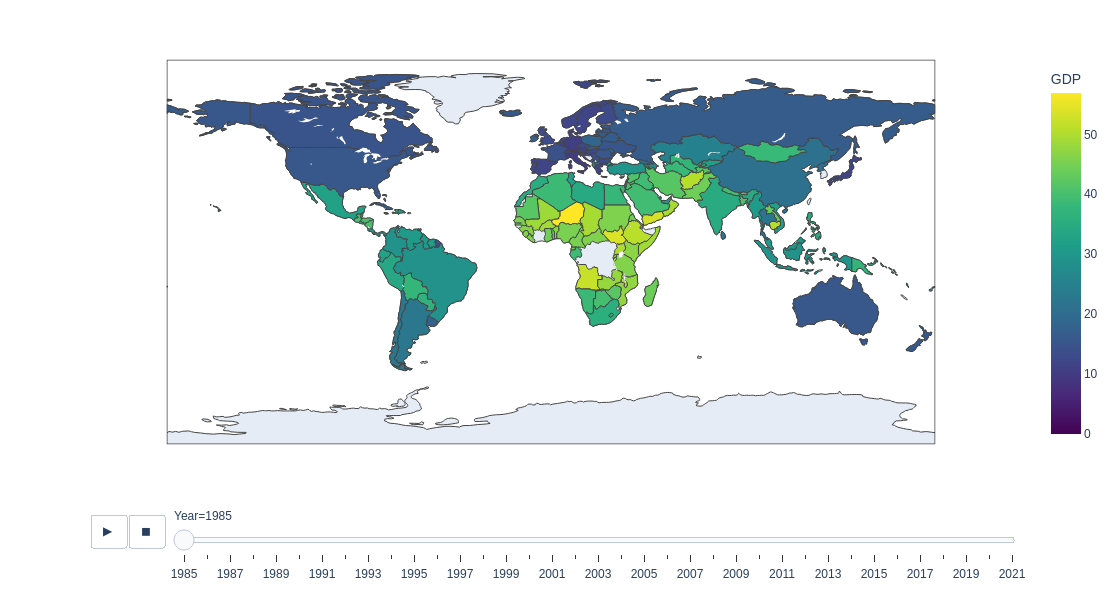

In [114]:
max_gdp = df_coro['GDP'].max()

fig = px.choropleth(df_coro,
                    locations = "Country Code",
                    color = "GDP",
                    scope = "world",
                    color_continuous_scale='viridis',  # Escala de color
                    range_color=(0, max_gdp),  # Rango de la escala de color
                    animation_frame = "Year")
fig.update_layout(width=1000, height=600)
fig.show()

In [118]:
america = df_combined[df_combined['Intermediate Region'] == 'South America']
america = america.drop(['Country Name EN', '2022', '2023', 'Image File', 'Image URL', 'Region', 'Sub Region', 'Income Group'], axis=1)
america['Total'] = america.sum(axis=1, numeric_only=1)
america['Total AVG'] = america['Total'].div(12)
america.head(50)



,Country Name ES,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2015,2016,2017,2018,2019,2020,2021,Intermediate Region,Total,Total AVG
Country Code,,,,,,,,,,,,,,,,,,,,,
ARG,Argentina,22.610,22.404,22.232,22.069,21.907,21.989,21.844,21.683,21.570,...,17.346,16.824,16.206,15.187,14.783,14.125,13.902,South America,701.584,58.465333
BOL,Bolivia,37.638,37.347,37.109,36.715,36.278,35.840,35.263,34.645,33.910,...,23.740,23.355,22.986,22.634,22.323,22.056,21.836,South America,1075.749,89.645750
BRA,Brasil,28.990,28.090,27.334,26.420,25.661,24.844,24.148,23.376,23.022,...,14.727,14.051,14.159,14.133,13.633,13.078,12.883,South America,708.850,59.070833
CHL,Chile,22.521,22.530,22.527,22.473,22.390,22.190,21.866,21.048,20.503,...,13.211,12.700,12.130,11.940,11.855,11.834,11.788,South America,609.925,50.827083
COL,Colombia,29.142,28.742,28.366,28.013,27.700,27.374,27.011,26.559,26.091,...,15.585,15.353,15.081,14.841,14.682,14.435,14.204,South America,775.439,64.619917
ECU,Ecuador,32.539,32.083,31.534,31.004,30.495,29.969,29.499,28.972,28.522,...,18.740,18.224,17.996,17.658,17.338,17.037,16.817,South America,900.309,75.025750
GUY,Guyana,30.773,30.405,30.092,29.851,29.515,29.117,28.717,28.731,28.598,...,21.310,21.139,20.958,20.770,20.828,20.473,20.298,South America,918.749,76.562417
PER,Perú,33.993,33.482,32.892,32.332,31.622,30.900,30.152,29.287,28.490,...,18.808,18.500,18.269,18.092,18.042,17.833,17.622,South America,889.826,74.152167
PRY,Paraguay,36.452,36.062,35.719,35.337,34.752,34.264,33.691,33.032,32.364,...,22.428,22.263,21.962,21.664,21.281,20.946,20.627,South America,999.516,83.293000


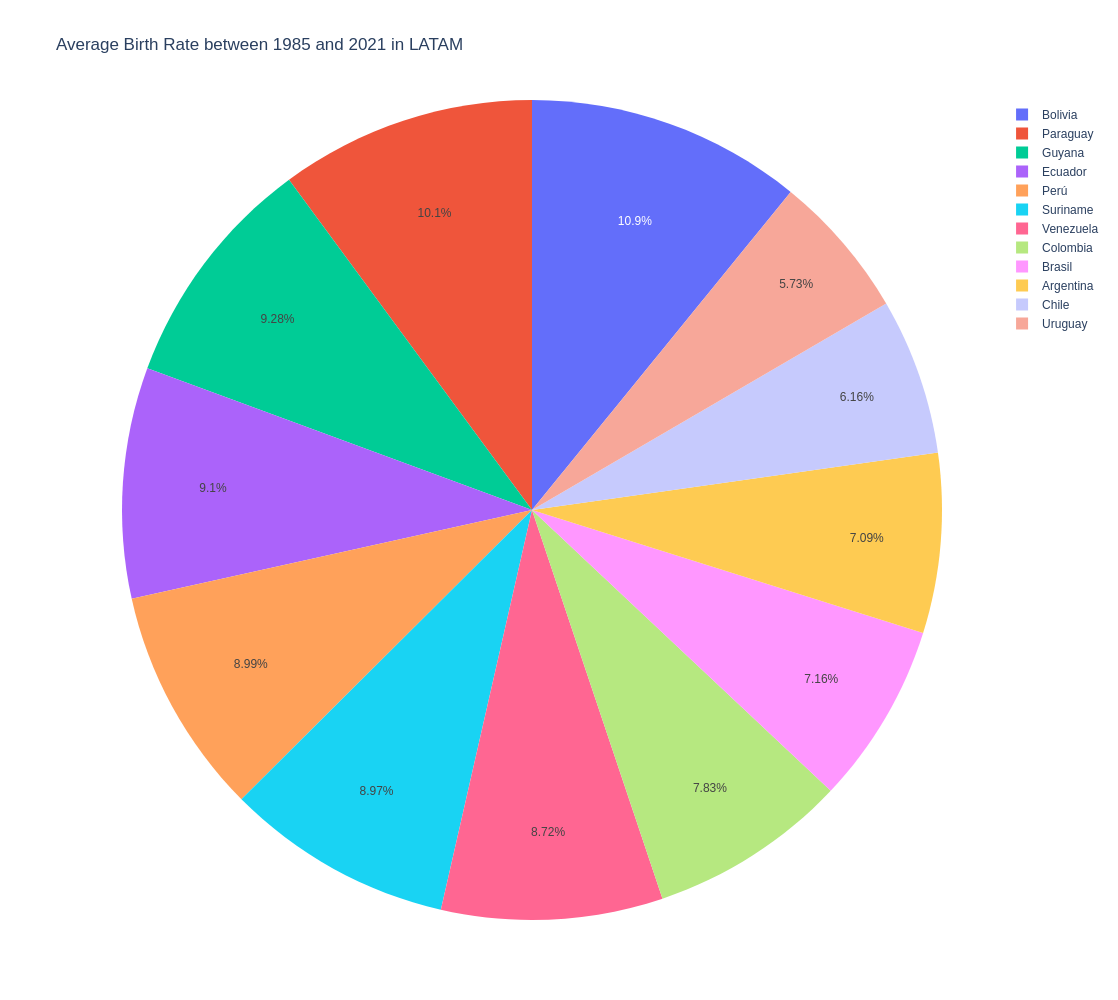

In [122]:
fig = px.pie(america, values='Total AVG', names='Country Name ES', title='Average Birth Rate between 1985 and 2021 in LATAM')
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000
)
fig.show()
